# Import

- Download and Import all the dependencies

In [ ]:
!pip install pmdarima

In [ ]:
import pmdarima as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
data_df = pd.read_csv(r'/content/FEDFUNDS.csv')
data_df.head()

,DATE,FEDFUNDS
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83


In [ ]:
print(data_df.isnull().sum())

DATE        0
FEDFUNDS    0
dtype: int64


In [ ]:
data_df['DATE'] = pd.to_datetime(data_df['DATE'])
data_df.set_index('DATE', inplace=True)
print(data_df.dtypes)

FEDFUNDS    float64
dtype: object


In [ ]:
data_df.head()

,FEDFUNDS
DATE,
1954-07-01,0.80
1954-08-01,1.22
1954-09-01,1.07
1954-10-01,0.85
1954-11-01,0.83


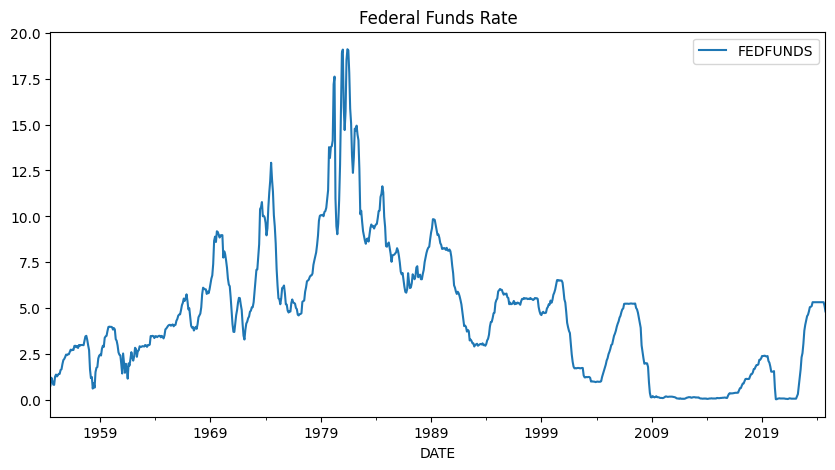

In [ ]:
data_df.plot(figsize=(10, 5), title="Federal Funds Rate")
plt.show()

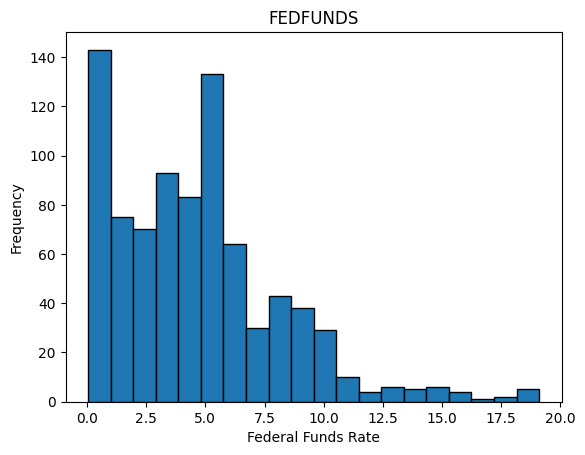

In [ ]:
from matplotlib import pyplot as plt
plt.hist(data_df['FEDFUNDS'], bins=20, edgecolor='black')
plt.xlabel('Federal Funds Rate')
plt.ylabel('Frequency')
plt.title('FEDFUNDS')
plt.show()

# Exploratory Data Analysis (EDA)

## Stationarity Check

### Augmented Dickey–Fuller test

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data_df['FEDFUNDS'], regresults=True)
print(result)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

if result[1]<0.05:
    print('\nIt is a stationary. Can move further!')
else:
    print('\nNot a stationary data, need some work!')

(-2.966771543955326, 0.03811620819938096, {'1%': -3.4382915719823934, '5%': -2.8650454292904577, '10%': -2.568636586835826}, <statsmodels.stats.diagnostic.ResultsStore object at 0x7ee092202620>)
ADF Statistic: -2.966771543955326
p-value: 0.03811620819938096

It is a stationary. Can move further!


- The p-value is 0.038, which is less than 0.05, indicating that the null hypothesis can be rejected at the 5% significance level.
- 1% Critical values does not satisfyies the hypothesis, while other does showing it is a boderline stationarity.

## Auto-correlation

/usr/local/lib/python3.10/dist-packages/pmdarima/utils/visualization.py:220: FutureWarning: the 'unbiased' keyword is deprecated, use 'adjusted' instead.
  res = tsaplots.plot_acf(


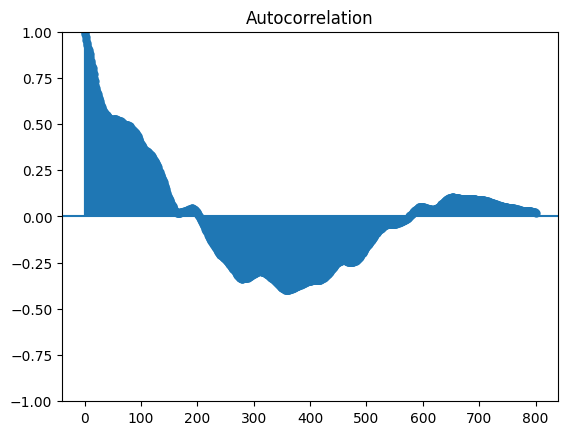

In [ ]:
pm.plot_acf(data_df['FEDFUNDS'], lags=800);

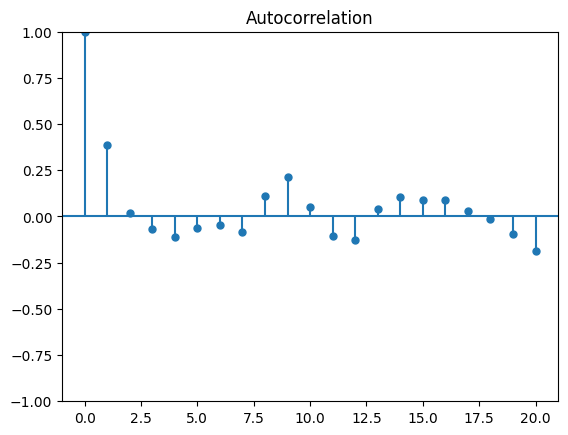

In [ ]:
pm.plot_acf(data_df['FEDFUNDS'].diff().dropna(), lags=20);

## Seasonality and Trend

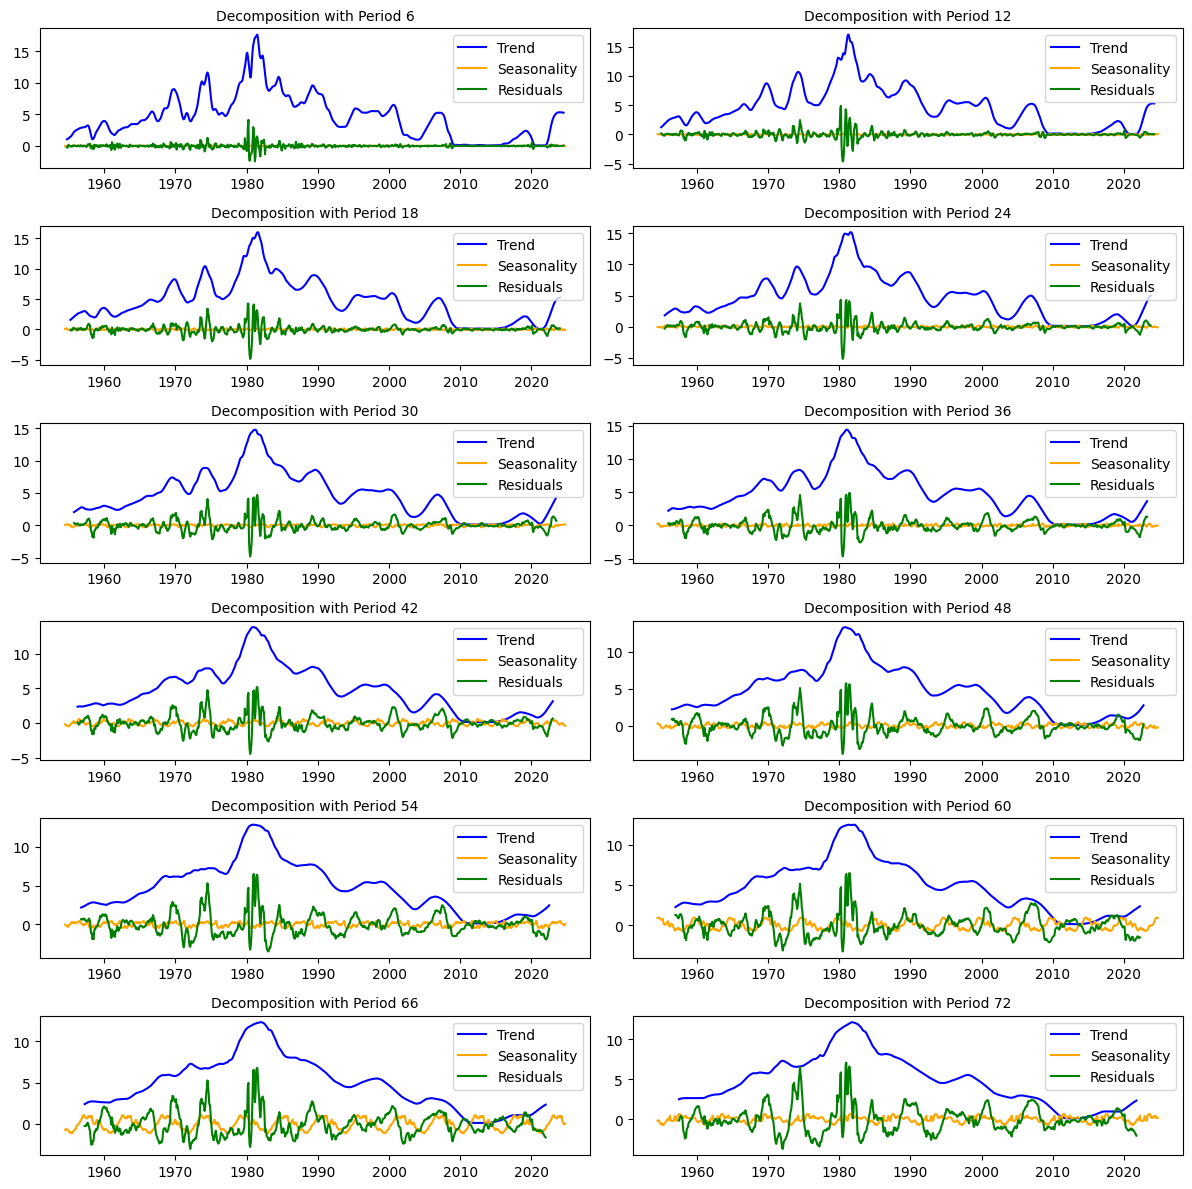

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Create subplots
fig, axes = plt.subplots(figsize=(12, 12), nrows=6, ncols=2)
axes = axes.flatten()  # Flatten axes for easier iteration

for i, ax in enumerate(axes):
    period = 6 * (i + 1)  # Adjust period as needed

    # Perform seasonal decomposition
    decomposition = seasonal_decompose(data_df['FEDFUNDS'], model='additive', period=period)

    # Plot components manually
    ax.plot(decomposition.trend, label='Trend', color='blue')
    ax.plot(decomposition.seasonal, label='Seasonality', color='orange')
    ax.plot(decomposition.resid, label='Residuals', color='green')

    ax.set_title(f"Decomposition with Period {period}", fontsize=10)
    ax.legend(loc='best')

# Adjust layout
plt.tight_layout()
plt.show()

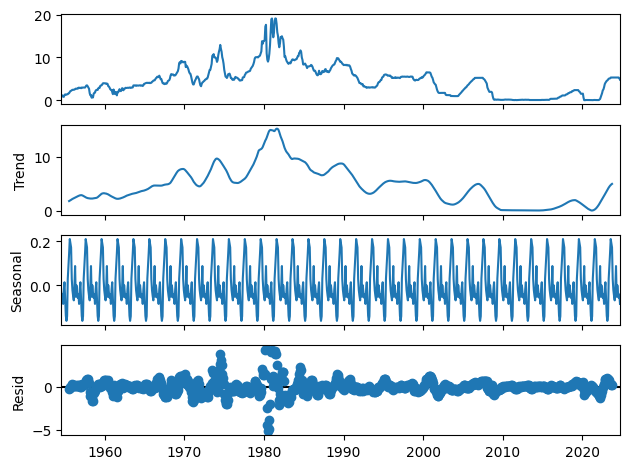

In [ ]:
seasonal_decompose(data_df, model='additive', period=24).plot();

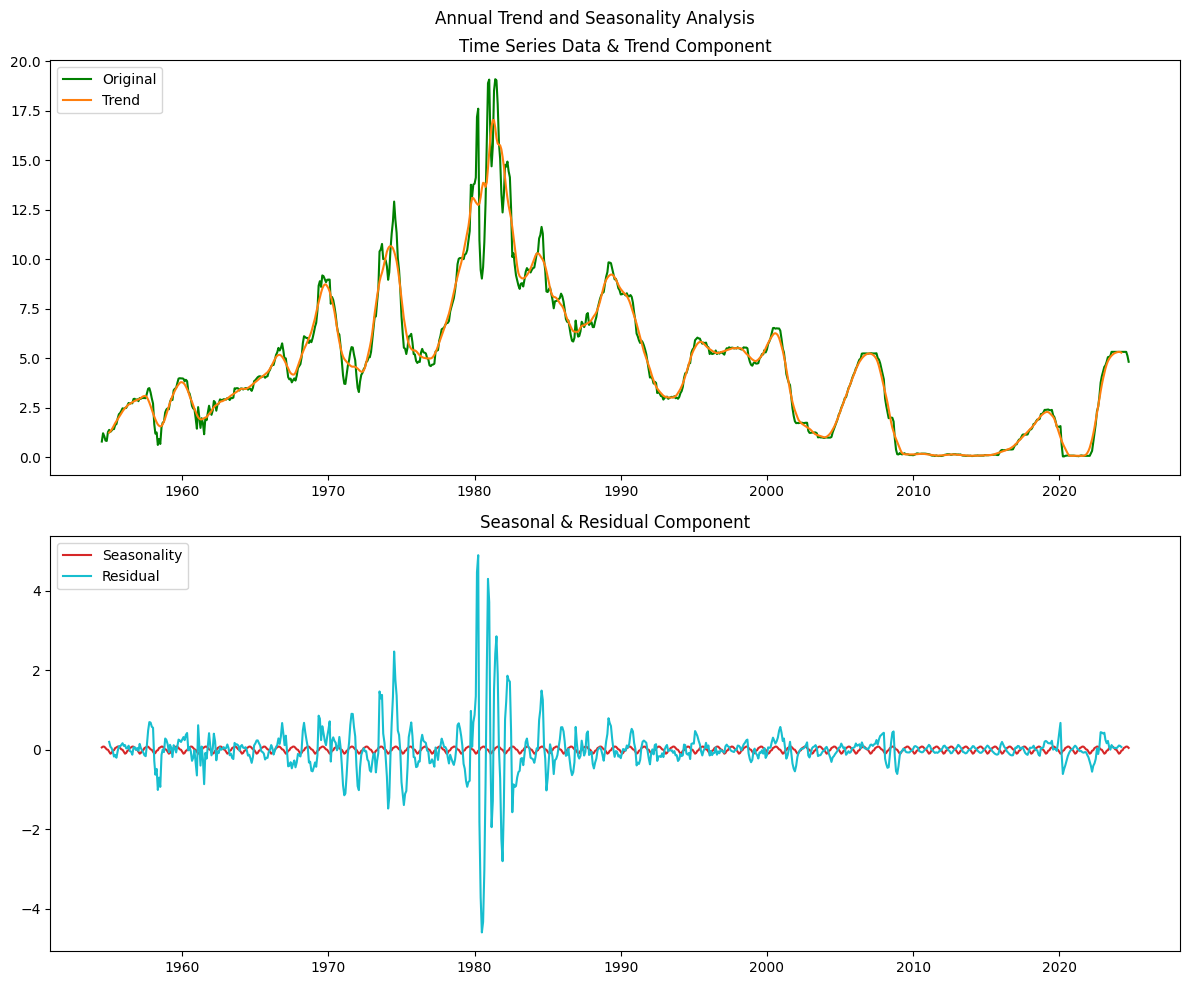

In [ ]:
# Plot the decomposed components
plt.figure(figsize=(12, 10))

# Original series
plt.subplot(2, 1, 1)
plt.plot(data_df['FEDFUNDS'], label='Original', color='green')
plt.title('Time Series Data & Trend Component')
plt.legend(loc='upper left')

decomposition = seasonal_decompose(data_df['FEDFUNDS'], model='additive')
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

# Trend component
plt.subplot(2, 1, 1)
plt.plot(trend, label='Trend', color='tab:orange')
plt.legend(loc='upper left')

# Seasonal component
plt.subplot(2, 1, 2)
plt.plot(seasonality, label='Seasonality', color='tab:red')
plt.legend(loc='upper left')

# Residual component
plt.subplot(2, 1, 2)
plt.plot(residual, label='Residual', color='tab:cyan')
plt.title('Seasonal & Residual Component')
plt.legend(loc='upper left')

plt.suptitle('Annual Trend and Seasonality Analysis')
# plt.twinx()
plt.tight_layout()
plt.show()

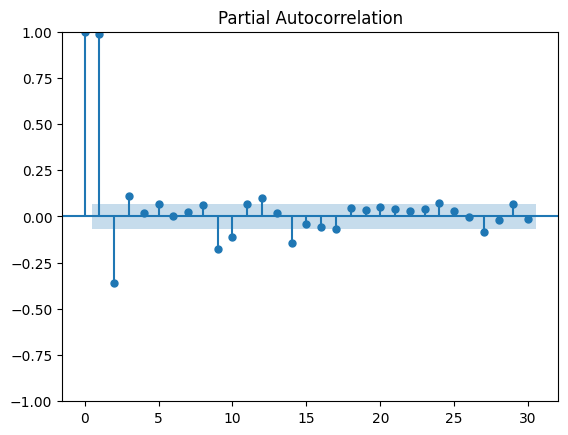

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data_df);

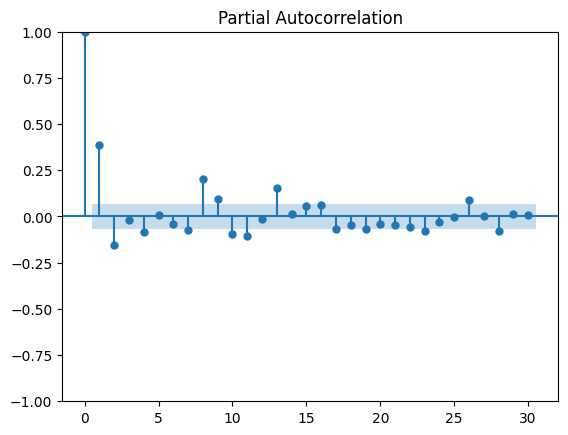

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data_df.diff().dropna());

In [ ]:
# lag = 3
# p = 3

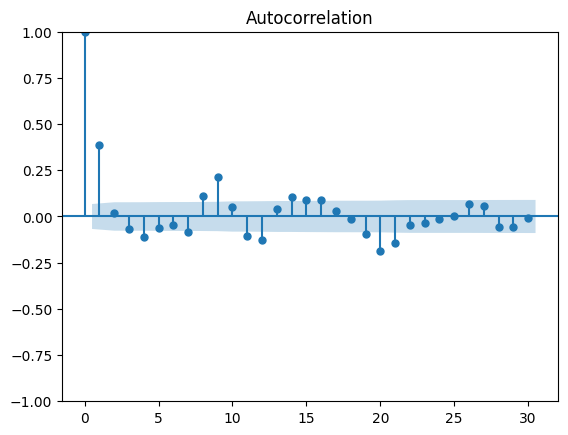

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data_df.diff().dropna());

In [ ]:
# q = 2 - 1 = 1

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data_df.diff().dropna(), regresults=True)
print(result)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

if result[1]<0.05:
    print('\nIt is a stationary. Can move further!')
else:
    print('\nNot a stationary data, need some work!')

(-6.4291852036557575, 1.7142537478578424e-08, {'1%': -3.438310908190086, '5%': -2.8650539530590673, '10%': -2.5686411274036196}, <statsmodels.stats.diagnostic.ResultsStore object at 0x7ee0918bcb80>)
ADF Statistic: -6.4291852036557575
p-value: 1.7142537478578424e-08

It is a stationary. Can move further!


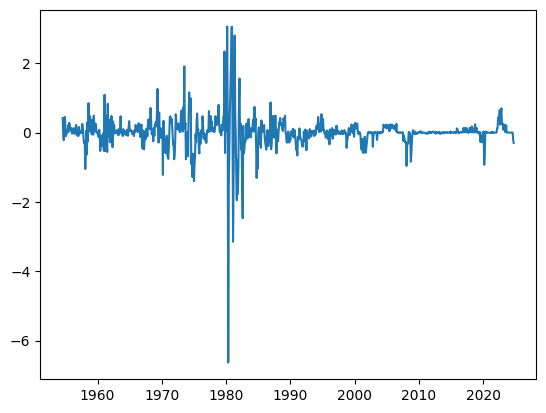

In [ ]:
plt.plot(data_df.diff().dropna());

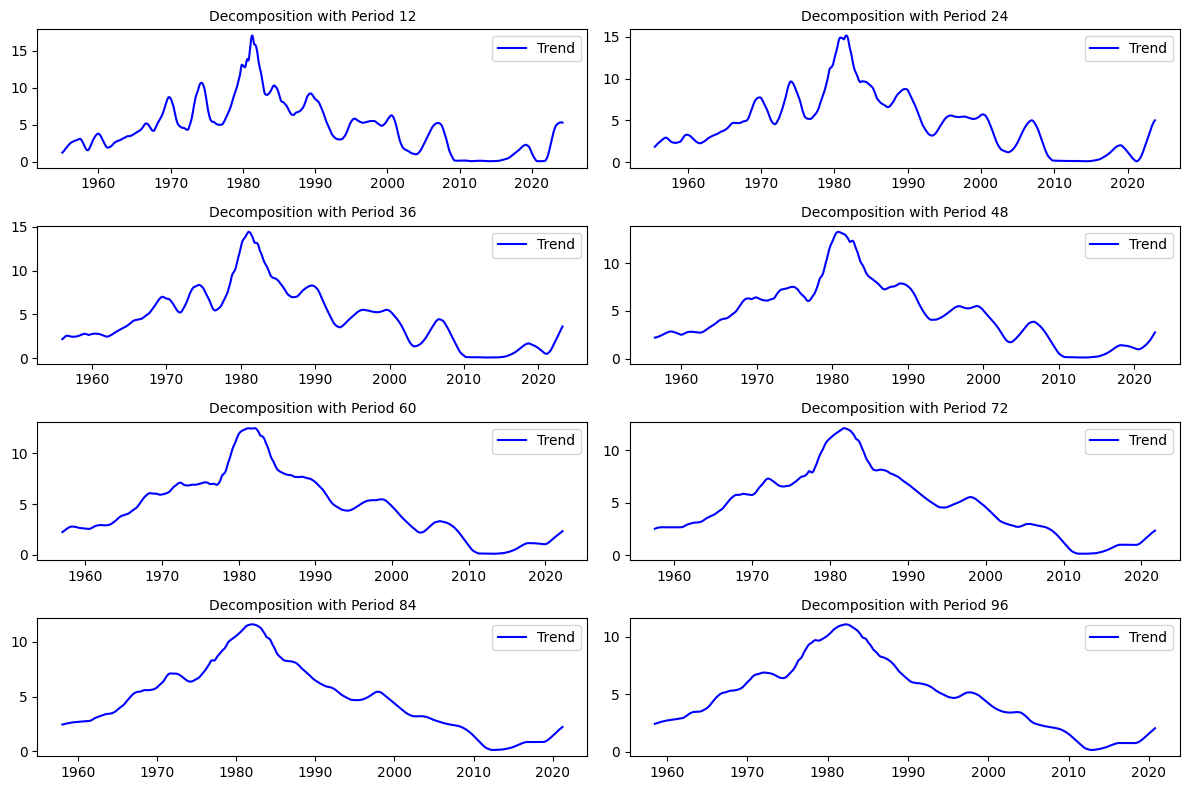

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Create subplots
fig, axes = plt.subplots(figsize=(12, 8), nrows=4, ncols=2)
axes = axes.flatten()  # Flatten axes for easier iteration

for i, ax in enumerate(axes):
    period = 12 * (i + 1)  # Adjust period as needed

    # Perform seasonal decomposition
    decomposition = seasonal_decompose(data_df['FEDFUNDS'], model='additive', period=period)

    # Plot components manually
    ax.plot(decomposition.trend, label='Trend', color='blue')
    # ax.plot(decomposition.seasonal, label='Seasonality', color='orange')
    # ax.plot(decomposition.resid, label='Residuals', color='green')

    ax.set_title(f"Decomposition with Period {period}", fontsize=10)
    ax.legend(loc='best')

# Adjust layout
plt.tight_layout()
plt.show()

# Models

### ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
'''
An ARIMA Model, or an Autoregressive Integrated Moving Average Model, is a time series model using past values to predict future values. This is done through the order hyperparameter, which holds the numerical values for all
hyperparameters in the model. It consists of the orders for three different parts of the model: the autoregression order p, order of differencing/integration d, and the moving average order q. The autoregression order is the
number of lagged terms used to predict future values. This value is 3, meaning the past three terms are used to predict each future value. The differencing order is the number of times the raw observations are differenced. Since
the value is 0, the observations get differenced zero times. The moving average order is the size of the moving average window, or how many terms are used to calculate the moving average. This means that the last two error terms are
used in this part of the model.
'''
arima_model = ARIMA(data_df['FEDFUNDS'],  order=(1, 0, 1))
arima = arima_model.fit()

print(arima.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               FEDFUNDS   No. Observations:                  844
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -507.849
Date:                Fri, 06 Dec 2024   AIC                           1023.699
Time:                        04:45:11   BIC                           1042.651
Sample:                    07-01-1954   HQIC                          1030.961
                         - 10-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3623      2.010      2.170      0.030       0.422       8.303
ar.L1          0.9840      0.004    238.478      0.000       0.976       0.992
ma.L1          0.4320      0.015     27.993      0.0

In [ ]:
#the next 10 months of data get forecasted
arima_forecast = arima.forecast(steps=6)
print(arima_forecast)

2024-11-01    4.733519
2024-12-01    4.727561
2025-01-01    4.721699
2025-02-01    4.715930
2025-03-01    4.710255
2025-04-01    4.704670
Freq: MS, Name: predicted_mean, dtype: float64


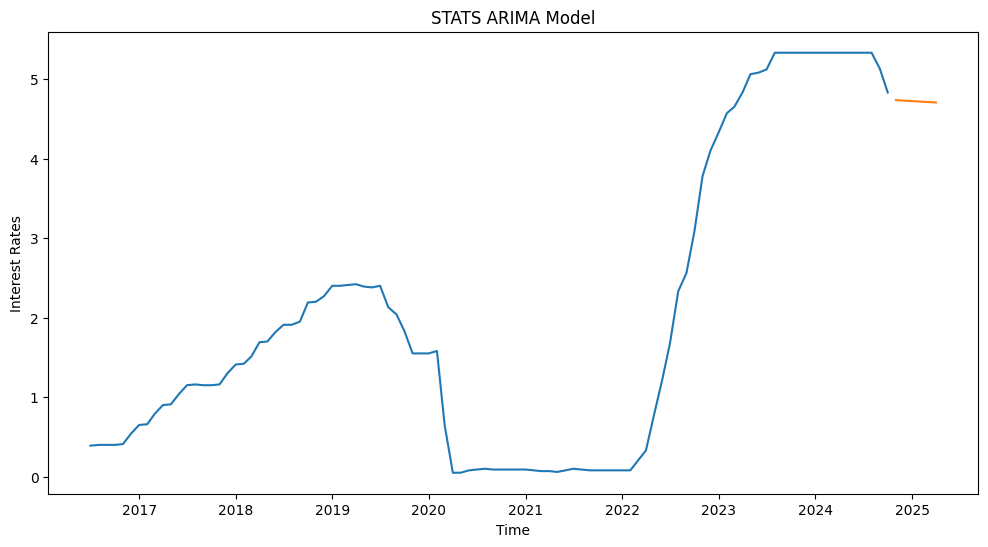

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data_df['FEDFUNDS'][-100:])
plt.plot(arima_forecast)
plt.title('STATS ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Interest Rates')
plt.show()

In [ ]:
# Predictions
predictions = arima.fittedvalues

# Calculate MSE and RMSE
mse = mean_squared_error(data_df['FEDFUNDS'], predictions)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Mean Squared Error (MSE): 0.2089
Root Mean Squared Error (RMSE): 0.4570


### SARIMA

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

'''
SARIMA Models are ARIMA Models that additionally account for seasonal effects. The order hyperparameter is the same as in the ARIMA Model, with three lagged terms in the autoregression, one order of differencing observations,
and a moving average window size of two. The seasonal order hyperparameter is where all the seasonal changes occur. These terms, indicated as the seasonal autoregression P, the seasonal differencing D, and the seasonal moving
average window Q, function similarly to the order hyperparameters, utilizing terms from previous seasons instead of the terms directly preceding the forecast. The last term, seasonal periodicity s, is the number of periods in
one "season." A value of 12 indicates every 12 periods is one season, meaning it's a yearly seasonality.
'''
sarima_model = SARIMAX(data_df['FEDFUNDS'], order=(1, 0, 1), seasonal_order=(1, 0, 1, 12))
sarima = sarima_model.fit()

print(sarima.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                           FEDFUNDS   No. Observations:                  844
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -503.476
Date:                            Fri, 06 Dec 2024   AIC                           1016.953
Time:                                    04:45:19   BIC                           1040.644
Sample:                                07-01-1954   HQIC                          1026.031
                                     - 10-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9955      0.002    549.067      0.000       0.992       0.999
ma.L1          0.4258      0.015   

In [ ]:
#forecasting the next 10 months
sarima_forecast = sarima.forecast(steps=6)
print(sarima_forecast)

2024-11-01    4.715306
2024-12-01    4.685636
2025-01-01    4.657538
2025-02-01    4.629389
2025-03-01    4.603733
2025-04-01    4.576526
Freq: MS, Name: predicted_mean, dtype: float64


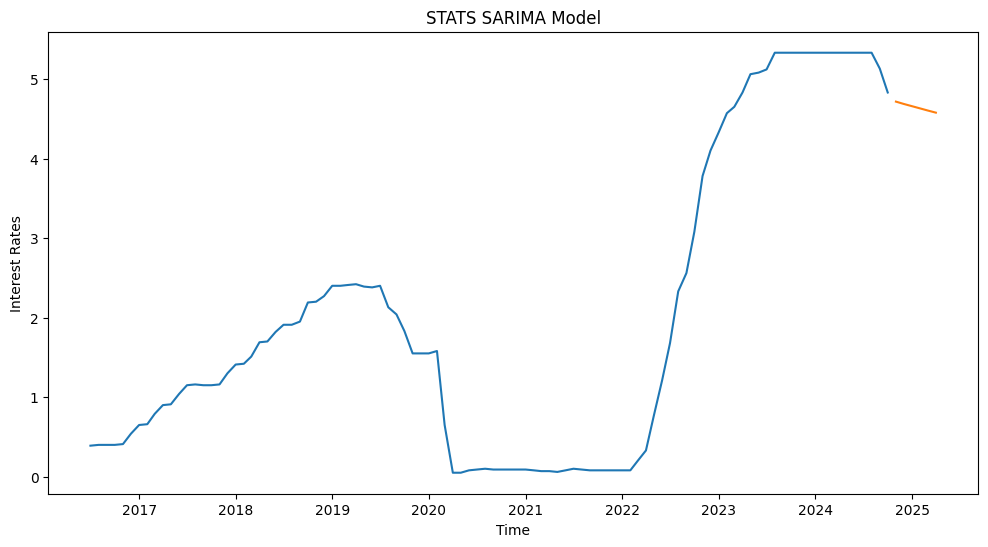

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data_df['FEDFUNDS'][-100:])
plt.plot(sarima_forecast)
plt.title('STATS SARIMA Model')
plt.xlabel('Time')
plt.ylabel('Interest Rates')
plt.show()

In [ ]:
# Predictions
predictions = sarima.fittedvalues

# Calculate MSE and RMSE
mse = mean_squared_error(data_df['FEDFUNDS'], predictions)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Mean Squared Error (MSE): 0.1926
Root Mean Squared Error (RMSE): 0.4388


## Exponential Smoothing

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(data_df['FEDFUNDS'], trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()
fitted_values = model_fit.fittedvalues
forecast = model_fit.forecast(6)

print(forecast)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2024-11-01    4.797866
2024-12-01    4.799027
2025-01-01    4.751158
2025-02-01    4.709598
2025-03-01    4.732164
2025-04-01    4.793596
Freq: MS, dtype: float64


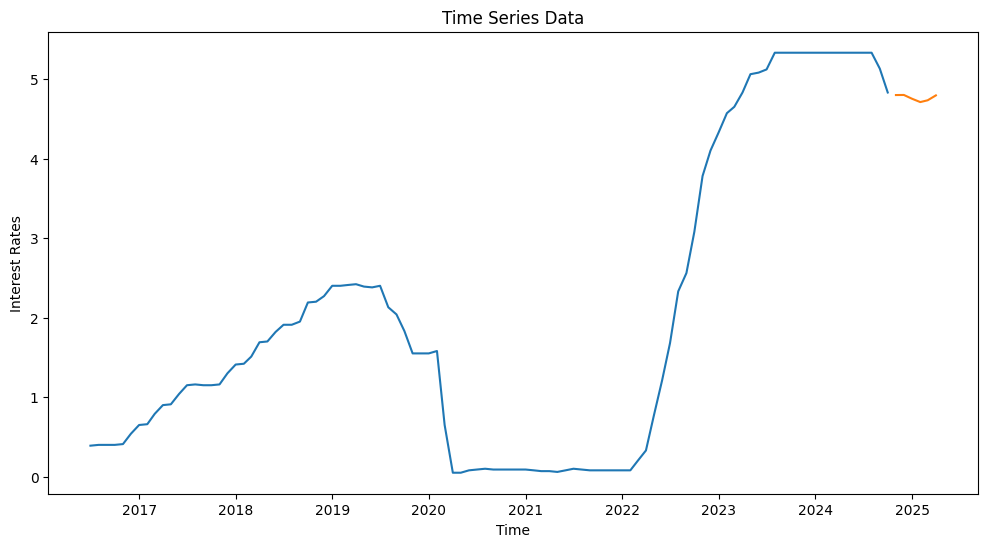

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data_df['FEDFUNDS'][-100:])
plt.plot(forecast)
plt.title('Time Series Data')
plt.xlabel('Time')
plt.ylabel('Interest Rates')
plt.show()

In [ ]:
# Calculate MSE and RMSE
mse = mean_squared_error(data_df['FEDFUNDS'], fitted_values)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Mean Squared Error (MSE): 0.2332
Root Mean Squared Error (RMSE): 0.4829


## LSTM

## Data Preprocessing and Feature Engineering

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
import tensorflow as tf

# Load the data
data = pd.read_csv(r'/content/FEDFUNDS.csv', parse_dates=['DATE'])
data.set_index('DATE', inplace=True)

# Display the first few rows
data.head()

,FEDFUNDS
DATE,
1954-07-01,0.80
1954-08-01,1.22
1954-09-01,1.07
1954-10-01,0.85
1954-11-01,0.83


Data Loading: The dataset FEDFUNDS.csv is read using pandas, with the DATE column parsed as datetime objects and set as the index for time series analysis.

### Handling Missing Values:

In [ ]:
# Check for missing values
print(data.isnull().sum())

# Since there are no missing values in the provided data, no imputation is necessary.

FEDFUNDS    0
dtype: int64


The dataset is checked for missing values. If any were present, appropriate imputation strategies (e.g., forward fill, interpolation) would be employed. In this case, the data is complete.

### Stationarity Testing:

Augmented Dickey-Fuller Test: Original Series
ADF Test Statistic: -2.966771543955326
p-value: 0.03811620819938096
# Lags Used: 17
Number of Observations Used: 826
=> The series is stationary.
Augmented Dickey-Fuller Test: Differenced Series
ADF Test Statistic: -6.4291852036557575
p-value: 1.7142537478578424e-08
# Lags Used: 18
Number of Observations Used: 824
=> The series is stationary.


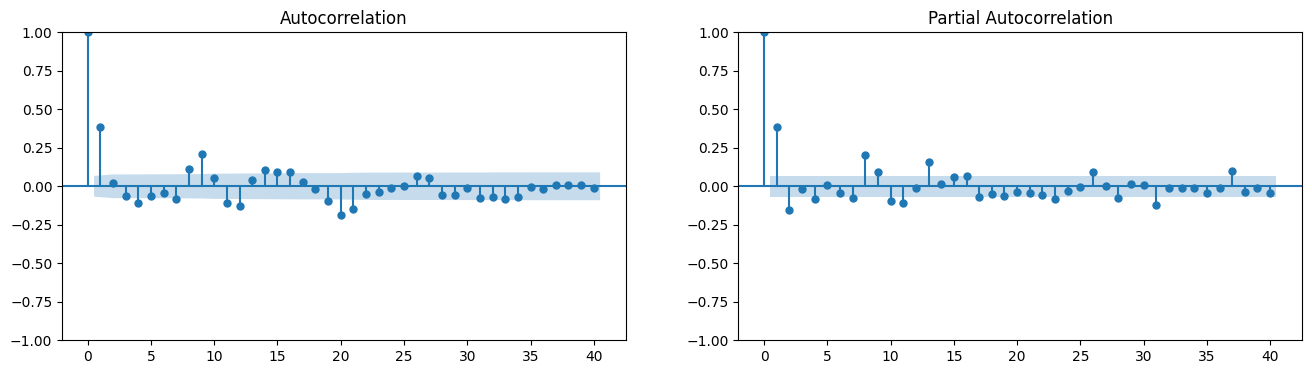

In [ ]:
# Function to perform ADF Test
def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series, autolag='AIC')
    labels = ['ADF Test Statistic','p-value','# Lags Used','Number of Observations Used']
    for value, label in zip(result[:4], labels):
        print(f'{label}: {value}')
    if result[1] <= 0.05:
        print("=> The series is stationary.")
    else:
        print("=> The series is non-stationary.")

# Perform ADF test on original series
adf_test(data['FEDFUNDS'], title='Original Series')

# Differencing to achieve stationarity
data['FedFunds_Diff'] = data['FEDFUNDS'].diff()
data.dropna(inplace=True)

# Perform ADF test on differenced series
adf_test(data['FedFunds_Diff'], title='Differenced Series')

# Plot ACF and PACF
import statsmodels.api as sm

fig, axes = plt.subplots(1, 2, figsize=(16,4))
sm.graphics.tsa.plot_acf(data['FedFunds_Diff'], lags=40, ax=axes[0])
sm.graphics.tsa.plot_pacf(data['FedFunds_Diff'], lags=40, ax=axes[1])
plt.show()

- ADF Test: Utilizes the Augmented Dickey-Fuller test to assess stationarity.
- Differencing: Applies first-order differencing to stabilize the mean of the time series by removing changes in the level of a time series, thereby eliminating trend and seasonality.
- ACF & PACF Plots: Diagnose the autocorrelation and partial autocorrelation in the differenced series, guiding model selection (e.g., identifying the order of ARIMA models).

### Feature Engineering:

In [ ]:
# Create additional time-based features
data['Month'] = data.index.month
data['Year'] = data.index.year

# Lag features: previous 3 months' rates
data['Lag1'] = data['FEDFUNDS'].shift(1)
data['Lag2'] = data['FEDFUNDS'].shift(2)
data['Lag3'] = data['FEDFUNDS'].shift(3)

# Rolling statistics
data['Rolling_Mean_3'] = data['FEDFUNDS'].rolling(window=3).mean()
data['Rolling_STD_3'] = data['FEDFUNDS'].rolling(window=3).std()

# Drop rows with NaN values created by shifting
data.dropna(inplace=True)

print(data.head())

            FEDFUNDS  FedFunds_Diff  Month  Year  Lag1  Lag2  Lag3  \
DATE                                                                 
1954-11-01      0.83          -0.02     11  1954  0.85  1.07  1.22   
1954-12-01      1.28           0.45     12  1954  0.83  0.85  1.07   
1955-01-01      1.39           0.11      1  1955  1.28  0.83  0.85   
1955-02-01      1.29          -0.10      2  1955  1.39  1.28  0.83   
1955-03-01      1.35           0.06      3  1955  1.29  1.39  1.28   

            Rolling_Mean_3  Rolling_STD_3  
DATE                                       
1954-11-01        0.916667       0.133167  
1954-12-01        0.986667       0.254231  
1955-01-01        1.166667       0.296704  
1955-02-01        1.320000       0.060828  
1955-03-01        1.343333       0.050332  


- Time-Based Features: Extracting the month and year can help the model capture seasonal trends.
- Lag Features: Incorporating previous months' interest rates allows the model to recognize temporal dependencies.
- Rolling Statistics: Calculating rolling mean and standard deviation smoothens the series and captures local trends.
- Data Cleaning: Rows with NaN values resulting from feature creation are removed to ensure model training integrity.

### Model Selection and Justification

- Choosing a Neural Network:
Given the sequential nature of the data and the presence of temporal dependencies, a Long Short-Term Memory (LSTM) network is an appropriate choice. LSTM networks are capable of learning long-term dependencies, making them suitable for time series forecasting tasks like predicting interest rates.

- Justification:

    - Sequence Prediction: Interest rates exhibit temporal patterns that LSTM can effectively capture.
    - Non-Linearity: LSTM can model complex, non-linear relationships inherent in economic data.
    - Flexibility: LSTM architectures can be customized with multiple layers and units to enhance performance.
    
- Features to Establish Relationships:

    - Lag Features: Allow the model to understand how past interest rates influence future rates.
    - Rolling Statistics: Help in capturing recent trends and volatility.
    - Time-Based Features: Assist in identifying seasonal effects.

# Model Selection and Justification

## Choosing a Neural Network (LSTM)

### Rationale
Given the sequential and temporal nature of the Federal Funds Rate data, Long Short-Term Memory (LSTM) networks are well-suited for capturing long-term dependencies and patterns within the data. LSTM's architecture, which includes memory cells and gating mechanisms, allows it to selectively retain and forget information, making it effective for time series forecasting tasks.

---

## Why LSTM Over Traditional Models?

### 1. **Handling Non-Linearity**
- **LSTM**: Capable of modeling complex, non-linear relationships inherent in economic data.  
- **ARIMA/SARIMA**: Primarily linear models; may struggle with non-linear patterns without transformations or extensions.

### 2. **Long-Term Dependencies**
- **LSTM**: Designed to capture dependencies over extended time horizons, making it ideal for data with long-term trends.  
- **ARIMA/SARIMA**: Limited in capturing long-term dependencies without increasing model complexity.

### 3. **Incorporation of Multiple Features**
- **LSTM**: Easily accommodates multiple input features, including time-based and engineered features.  
- **ARIMA/SARIMA**: While it is possible to include exogenous variables (ARIMAX/SARIMAX), integration is more cumbersome and less flexible.

### 4. **Robustness to Missing Data and Irregularities**
- **LSTM**: Can handle sequences with varying lengths and is more robust to missing data patterns with appropriate preprocessing.  
- **ARIMA/SARIMA**: Typically requires regular, equally spaced time intervals and may necessitate imputation or interpolation for missing data.

### 5. **Automation and Flexibility**
- **LSTM**: Easily customizable with various architectures, layers, and hyperparameters to optimize performance.  
- **ARIMA/SARIMA**: Requires manual identification of model parameters (p, d, q) and seasonal parameters for SARIMA, which can be time-consuming.

---

## Comparison with Other Models

### 1. **ARIMA/SARIMA**
- **Pros**:  
  - Well-established for time series forecasting.  
  - Interpretable parameters.  
- **Cons**:  
  - Limited to linear relationships.  
  - Manual parameter tuning.  
  - Less effective with non-stationary and high-volatility data without extensive preprocessing.

### 2. **FB Prophet**
- **Pros**:  
  - Handles seasonality, holidays, and trend changes automatically.  
  - User-friendly.  
- **Cons**:  
  - Primarily designed for daily data with clear seasonality.  
  - May not capture intricate temporal dependencies as effectively as LSTM.

### 3. **Exponential Smoothing (e.g., Holt-Winters)**
- **Pros**:  
  - Simple to implement.  
  - Effective for data with trend and seasonality.  
- **Cons**:  
  - Assumes additive or multiplicative seasonality.  
  - Limited in capturing complex patterns and dependencies.

### 4. **Traditional Machine Learning Models (e.g., Random Forests, Gradient Boosting)**
- **Pros**:  
  - Handle non-linear relationships.  
  - Provide feature importance insights.  
- **Cons**:  
  - Do not inherently capture temporal dependencies.  
  - Require extensive feature engineering to model time-based patterns.

---

## Conclusion
While traditional models like ARIMA/SARIMA and FB Prophet are effective for specific types of time series data, the LSTM network offers greater flexibility, capacity to model non-linear relationships, and ability to capture long-term dependencies inherent in the Federal Funds Rate data. This makes LSTM a more suitable choice for our forecasting task.

In [ ]:
# Feature and Target Separation
feature_cols = ['Month', 'Year', 'Lag1', 'Lag2', 'Lag3', 'Rolling_Mean_3', 'Rolling_STD_3']
target_col = 'FEDFUNDS'

features = data[feature_cols]
target = data[[target_col]]

# Initialize scalers
feature_scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scalers
scaled_features = feature_scaler.fit_transform(features)
scaled_target = target_scaler.fit_transform(target)

# Combine scaled features and target into a single DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=feature_cols, index=data.index)
scaled_df['FEDFUNDS'] = scaled_target

# Define the target variable
target = 'FEDFUNDS'

# Function to create sequences
def create_sequences(df, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(df)):
        X.append(df.iloc[i-seq_length:i][feature_cols + [target]].values)
        y.append(df.iloc[i][target])
    return np.array(X), np.array(y)

# Define sequence length
SEQ_LENGTH = 12  # Using past 12 months to predict the next month

# Create sequences
X, y = create_sequences(scaled_df, SEQ_LENGTH)

# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f'\nTraining samples: {X_train.shape[0]}')
print(f'Testing samples: {X_test.shape[0]}')


Training samples: 662
Testing samples: 166


- Feature Selection: Only relevant features are selected for modeling.
- Scaling: Features are scaled between 0 and 1 to facilitate efficient training of the neural network.
- Sequence Creation: Using the past 12 months (SEQ_LENGTH = 12) of data to predict the subsequent month's interest rate.
- Train-Test Split: 80% of the data is used for training, and 20% for testing to evaluate model performance.

### Model Architectre

In [ ]:
# Define the LSTM model
model = Sequential()

# First LSTM layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

# Second LSTM layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Dense layers
model.add(Dense(units=25))
model.add(Dense(units=1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 12, 50)              │          11,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 12, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,301 (130.08 KB)

 Trainable params: 33,301 (130.08 KB)

 Non-trainable params: 0 (0.00 B)

- First LSTM Layer: 50 units with return_sequences=True to pass the entire sequence to the next LSTM layer.
- Dropout: Regularization technique to prevent overfitting by randomly dropping 20% of the neurons.
- Second LSTM Layer: Another LSTM layer with 50 units, capturing deeper temporal dependencies.

- Dense Layers:
    - First Dense layer with 25 units to learn complex patterns.
    - Output Dense layer with 1 unit to predict the interest rate.
    
- Compilation: The model uses the Adam optimizer and Mean Squared Error (MSE) as the loss function, suitable for regression tasks.


### Model Training

In [ ]:
# Define early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0690 - val_loss: 0.0043
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0088 - val_loss: 0.0026
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0072 - val_loss: 0.0024
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0091 - val_loss: 0.0019
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0068 - val_loss: 0.0026
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0071 - val_loss: 0.0019
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0058 - val_loss: 0.0014
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0060 - val_loss: 0.0017
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0047 - val_loss: 0.0025
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0052 - val_loss: 0.0014
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0050 - val_loss: 0.0010
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step

- Early Stopping: Monitors validation loss and stops training if no improvement is observed for 10 consecutive epochs.
- Training Parameters:
    - Epochs: Maximum of 100 iterations.
    - Batch Size: 32 samples per gradient update.
- Validation Data: Helps in monitoring the model's performance on unseen data during training.

### Evaluation Metrics

- Mean Squared Error (MSE): Measures the average squared difference between the predicted and actual values.
- Root Mean Squared Error (RMSE): Square root of MSE, providing error in the same unit as the target variable.
- Mean Absolute Error (MAE): Average absolute difference between predicted and actual values.

In [ ]:
# Predict on test data
y_pred = model.predict(X_test)

# Inverse transform to get actual values
y_test_inv = target_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_inv = target_scaler.inverse_transform(y_pred).flatten()

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inv, y_pred_inv)

print(f'\nMean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step

Mean Squared Error (MSE): 0.1388
Root Mean Squared Error (RMSE): 0.3726
Mean Absolute Error (MAE): 0.2290


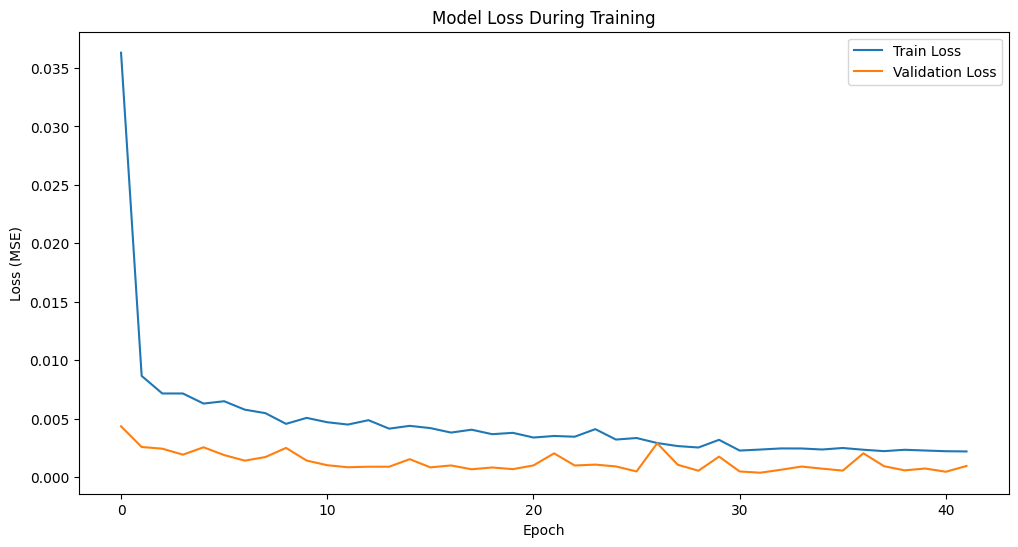

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend()
plt.show()

- Training vs Validation Loss: The plot shows how the model's loss decreases over epochs for both training and validation sets. A convergence without significant divergence indicates good generalization.

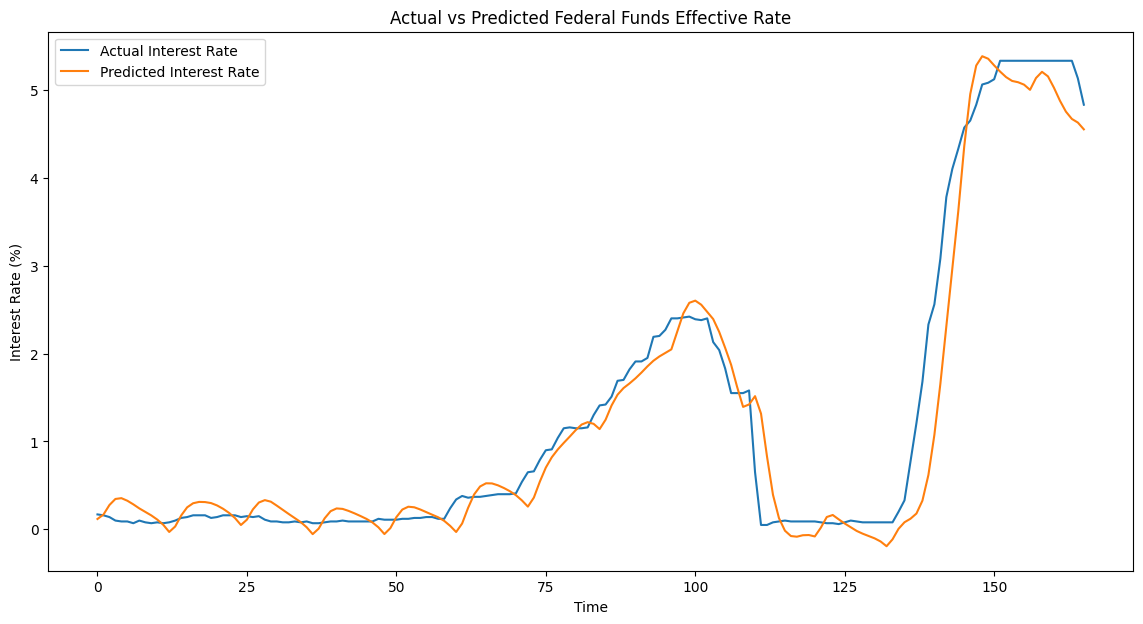

In [ ]:
# Plotting Actual vs Predicted
plt.figure(figsize=(14,7))
plt.plot(y_test_inv, label='Actual Interest Rate')
plt.plot(y_pred_inv, label='Predicted Interest Rate')
plt.title('Actual vs Predicted Federal Funds Effective Rate')
plt.xlabel('Time')
plt.ylabel('Interest Rate (%)')
plt.legend()
plt.show()

- Prediction Accuracy: The Actual vs Predicted plot visualizes the model's performance. Close alignment between the two suggests accurate predictions.

In [ ]:
def predict_future(model, scaler, data, feature_cols, target_col, seq_length, months_ahead):
    predictions = []
    last_sequence = data[-seq_length:].copy()  # Get the last 'seq_length' months from the scaled data

    for _ in range(months_ahead):
        # Prepare input
        X_input = last_sequence[feature_cols + [target_col]].values
        X_input = X_input.reshape((1, seq_length, len(feature_cols) + 1))

        # Predict
        y_pred = model.predict(X_input)

        # Inverse transform the prediction
        y_pred_inv = scaler.inverse_transform(np.concatenate((y_pred,
                                                              np.zeros((y_pred.shape[0], len(feature_cols)))),
                                                             axis=1))[:, 0]
        predictions.append(y_pred_inv[0])

        # Prepare the new input sequence by appending the prediction
        new_row = last_sequence.iloc[-1].copy()  # Create a copy of the last row
        new_row[target_col] = y_pred[0][0]  # Update the target column with the predicted value

        # Use pd.concat() to add the new row
        last_sequence = pd.concat([last_sequence.iloc[1:], pd.DataFrame([new_row])], ignore_index=True)

    return predictions

# Define parameters
months_ahead = 5  # Predicting December 2024 to March 2025
predicted_rates = predict_future(model, target_scaler, scaled_df, feature_cols, target_col, SEQ_LENGTH, months_ahead)

# Define prediction dates
last_date = data.index[-1]  # Assuming last date is November 2024
prediction_dates = [last_date + pd.DateOffset(months=i) for i in range(1, months_ahead + 1)]

# Create a DataFrame for predictions
prediction_df = pd.DataFrame({
    'Date': prediction_dates,
    'Predicted FEDFUNDS': predicted_rates
})

print("\nMulti-Step Forecast Predictions:")
print(prediction_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

Multi-Step Forecast Predictions:
        Date  Predicted FEDFUNDS
0 2024-11-01            4.379749
1 2024-12-01            4.174398
2 2025-01-01            3.988969
3 2025-02-01            3.706872
4 2025-03-01            3.446588


- Recommendations for Improvements:

    - Incorporate External Features: Including other economic indicators (e.g., GDP growth, unemployment rates) could enhance model performance.
    - Hyperparameter Tuning: Experimenting with different numbers of layers, units, dropout rates, and learning rates might yield better results.
    - Advanced Architectures: Exploring more sophisticated models like GRU or Transformer-based architectures could capture complex patterns more efficiently.
    - Cross-Validation: Implementing time series cross-validation can provide a more robust evaluation of the model's performance.

In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.5 MB/s eta 0:00:00


Trial 20 Complete [00h 00m 11s]
val_loss: 0.0013849653769284487

Best val_loss So Far: 0.0003949626407120377
Total elapsed time: 00h 07m 40s
Results summary
Results in lstm_tuning/fedfunds_rate_prediction
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 07 summary
Hyperparameters:
num_layers: 1
units_0: 128
dropout_0: 0.30000000000000004
num_dense: 3
dense_units_0: 16
learning_rate: 0.00924332103844362
units_1: 128
dropout_1: 0.1
dense_units_1: 32
dense_units_2: 16
Score: 0.0003949626407120377

Trial 18 summary
Hyperparameters:
num_layers: 1
units_0: 64
dropout_0: 0.1
num_dense: 3
dense_units_0: 64
learning_rate: 0.007487658008462713
units_1: 32
dropout_1: 0.30000000000000004
dense_units_1: 64
dense_units_2: 32
Score: 0.00041617071838118136

Trial 11 summary
Hyperparameters:
num_layers: 1
units_0: 128
dropout_0: 0.2
num_dense: 3
dense_units_0: 32
learning_rate: 0.0017882630083374004
units_1: 96
dropout_1: 0.5
dense_units_1: 32
dense_units_2: 32
Score: 0.0005607

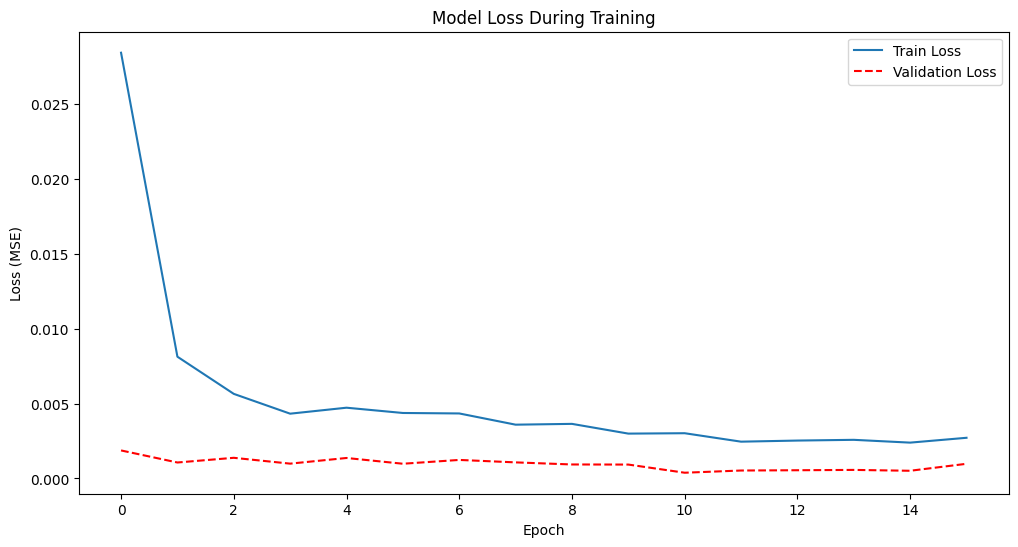

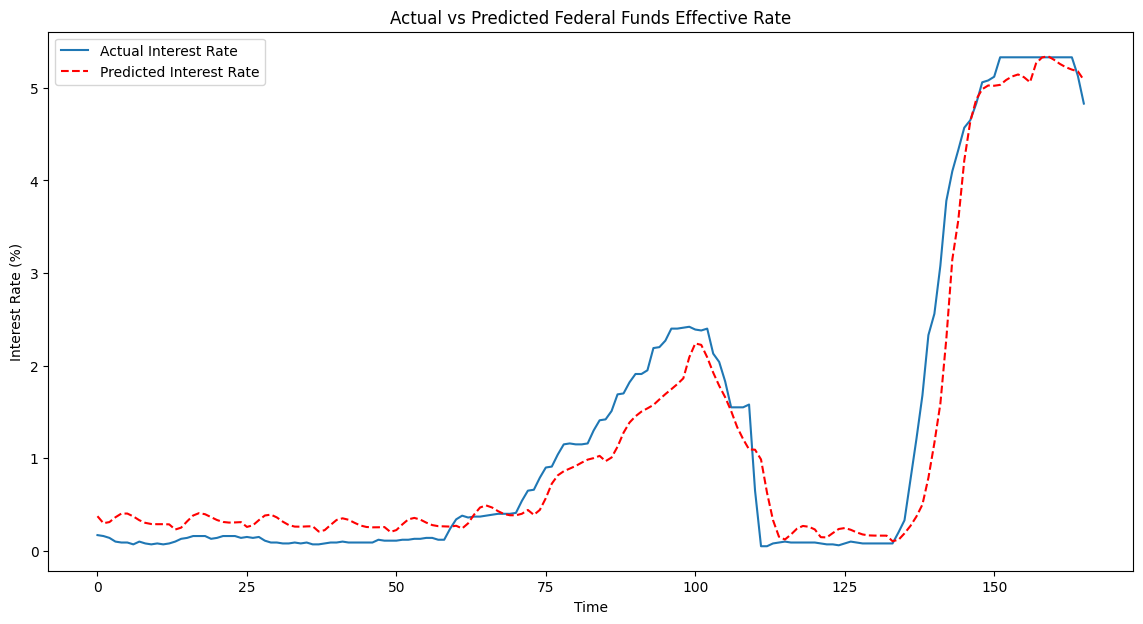

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt
import tensorflow as tf

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Hyperparameter Tuning with Keras Tuner
# -----------------------------------------

# Define the model-building function for Keras Tuner
def build_model(hp):
    model = Sequential()

    # Hyperparameter: Number of LSTM layers (1 or 2)
    num_layers = hp.Int('num_layers', 1, 2)

    for i in range(num_layers):
        # Hyperparameter: Number of units in LSTM layer
        units = hp.Int(f'units_{i}', min_value=32, max_value=128, step=32)

        # Hyperparameter: Dropout rate
        dropout_rate = hp.Float(f'dropout_{i}', min_value=0.1, max_value=0.5, step=0.1)

        if i == 0:
            # First layer specifies input shape
            model.add(LSTM(units=units, return_sequences=(num_layers > 1), input_shape=(X_train.shape[1], X_train.shape[2])))
        else:
            # Subsequent layers
            model.add(LSTM(units=units, return_sequences=(i < num_layers -1)))

        model.add(Dropout(rate=dropout_rate))

    # Hyperparameter: Number of Dense layers
    num_dense = hp.Int('num_dense', 1, 3)

    for j in range(num_dense):
        # Hyperparameter: Number of units in Dense layer
        dense_units = hp.Int(f'dense_units_{j}', min_value=16, max_value=64, step=16)
        model.add(Dense(units=dense_units, activation='relu'))

    # Output layer
    model.add(Dense(units=1, activation='linear'))

    # Hyperparameter: Learning rate for optimizer
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')

    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='mean_squared_error'
    )

    return model

# Initialize the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=20,
    executions_per_trial=1,
    directory='lstm_tuning',
    project_name='fedfunds_rate_prediction'
)

# Display search space summary
tuner.search_space_summary()

# Define early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Perform hyperparameter search
tuner.search(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

# Display tuner results
tuner.results_summary()

# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("\nBest Hyperparameters:")
for param in best_hps.values:
    print(f"{param}: {best_hps.get(param)}")

# Building and Training the Best Model
# ----------------------------------------

# Build the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

# Model Evaluation
# -------------------

# Predict on test data
y_pred = model.predict(X_test)

# Inverse transform to get actual values
y_test_inv = target_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_inv = target_scaler.inverse_transform(y_pred).flatten()

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inv, y_pred_inv)

print(f'\nEvaluation Metrics on Test Data:')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')

# Visualization
# ----------------

# Plot training & validation loss
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='dashed', color='red')
plt.title('Model Loss During Training')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot Actual vs Predicted
plt.figure(figsize=(14,7))
plt.plot(y_test_inv, label='Actual Interest Rate')
plt.plot(y_pred_inv, label='Predicted Interest Rate', linestyle='dashed', color='red')
plt.title('Actual vs Predicted Federal Funds Effective Rate')
plt.xlabel('Time')
plt.ylabel('Interest Rate (%)')
plt.legend()
plt.show()

In [ ]:
def predict_future(model, scaler, data, feature_cols, target_col, seq_length, months_ahead):
    predictions = []
    last_sequence = data[-seq_length:].copy()  # Get the last 'seq_length' months from the scaled data

    for _ in range(months_ahead):
        # Prepare input
        X_input = last_sequence[feature_cols + [target_col]].values
        X_input = X_input.reshape((1, seq_length, len(feature_cols) + 1))

        # Predict
        y_pred = model.predict(X_input)

        # Inverse transform the prediction
        y_pred_inv = scaler.inverse_transform(np.concatenate((y_pred,
                                                              np.zeros((y_pred.shape[0], len(feature_cols)))),
                                                             axis=1))[:, 0]
        predictions.append(y_pred_inv[0])

        # Prepare the new input sequence by appending the prediction
        new_row = last_sequence.iloc[-1].copy()  # Create a copy of the last row
        new_row[target_col] = y_pred[0][0]  # Update the target column with the predicted value

        # Use pd.concat() to add the new row
        last_sequence = pd.concat([last_sequence.iloc[1:], pd.DataFrame([new_row])], ignore_index=True)

    return predictions

# Define parameters
months_ahead = 5  # Predicting December 2024 to March 2025
predicted_rates = predict_future(model, target_scaler, scaled_df, feature_cols, target_col, SEQ_LENGTH, months_ahead)

# Define prediction dates
last_date = data.index[-1]  # Assuming last date is November 2024
prediction_dates = [last_date + pd.DateOffset(months=i) for i in range(1, months_ahead + 1)]

# Create a DataFrame for predictions
prediction_df = pd.DataFrame({
    'Date': prediction_dates,
    'Predicted FEDFUNDS': predicted_rates
})

print("\nMulti-Step Forecast Predictions:")
print(prediction_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step

Multi-Step Forecast Predictions:
        Date  Predicted FEDFUNDS
0 2024-11-01            4.843707
1 2024-12-01            4.691161
2 2025-01-01            4.620060
3 2025-02-01            4.618338
4 2025-03-01            4.656685
